<a href="https://colab.research.google.com/github/Praveen8824/loan_grade_predicitor/blob/main/loan_grade_predicitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

importing all essential libraries


In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pd.pandas.set_option("display.max_columns",None)

In [118]:
sbn.set()

impoting data

In [119]:
data=pd.read_csv("/content/archive.zip")

In [120]:
data

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT


In [121]:
data.shape

(32586, 13)

handling nan values

In [122]:
data.isna().sum().sort_values()

customer_age               0
customer_income            0
home_ownership             0
loan_intent                0
loan_grade                 0
term_years                 0
cred_hist_length           0
loan_amnt                  1
customer_id                3
Current_loan_status        4
employment_duration      895
loan_int_rate           3116
historical_default     20737
dtype: int64

In [123]:
#historical_default contains a large number of null value
#so it better to remove this column

In [124]:
del data["historical_default"]

In [125]:
data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,4,DEFAULT


In [126]:
data.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [127]:
imputer=SimpleImputer(strategy="mean")
valuessss=imputer.fit_transform(data[["loan_int_rate","employment_duration"]])
mini_df=pd.DataFrame(valuessss,columns=["loan_int_rate","employment_duration"])

In [128]:
data[["loan_int_rate","employment_duration"]]=mini_df


In [129]:
data.isna().sum()

customer_id            3
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              1
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    4
dtype: int64

In [130]:
data.dropna(inplace=True)
data=data.reset_index()

In [131]:
data.isna().sum()

index                  0
customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [132]:
del data["index"]

In [133]:
data.isna().sum()


customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

handling categorical value

In [134]:
data["home_ownership"].value_counts()

home_ownership
RENT        16447
MORTGAGE    13441
OWN          2583
OTHER         107
Name: count, dtype: int64

home_ownership
RENT        16447
MORTGAGE    13441
OWN          2583
OTHER         107
Name: count, dtype: int64

RENT
OTHER
MORTGAGE
OWN

In [135]:
data["home_ownership"].replace(["RENT","OTHER","MORTGAGE","OWN"],[1,2,3,4],inplace=True)

In [136]:
data["loan_intent"].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6072
VENTURE              5717
PERSONAL             5519
DEBTCONSOLIDATION    5211
HOMEIMPROVEMENT      3606
Name: count, dtype: int64

loan_intent
EDUCATION            6453
MEDICAL              6072
VENTURE              5717
PERSONAL             5519
DEBTCONSOLIDATION    5211
HOMEIMPROVEMENT      3606
Name: count, dtype: int64


In [137]:
df_extended1=pd.get_dummies(data["loan_intent"])
data[df_extended1.columns]=df_extended1

In [138]:
data.isna().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
DEBTCONSOLIDATION      0
EDUCATION              0
HOMEIMPROVEMENT        0
MEDICAL                0
PERSONAL               0
VENTURE                0
dtype: int64

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
DEBTCONSOLIDATION      0
EDUCATION              0
HOMEIMPROVEMENT        0
MEDICAL                0
PERSONAL               0
VENTURE                0
dtype: int64


In [139]:
del data["loan_intent"]

In [140]:
data.shape

(32578, 17)

converting data from string type to float

In [141]:
li=[]
for i in range(32578):
    s=""
    for i in data["loan_amnt"][i]:
        if i!=',' and i!='£':
            s=s+i
    li.append(float(s))

ri=[]
for i in range(32578):
    g=""
    for i in data["customer_income"][i]:
        if i!=',' and i!='£':
            g=g+i
    ri.append(int(g))

In [142]:
data["loan_amnt"]=pd.DataFrame(li)
data["customer_income"]=pd.DataFrame(ri)


In [143]:
data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,1.0,22,59000,1,123.0,C,35000.0,16.02,10,3,DEFAULT,False,False,False,False,True,False
1,2.0,21,9600,4,5.0,A,1000.0,11.14,1,2,NO DEFAULT,False,True,False,False,False,False
2,3.0,25,9600,3,1.0,B,5500.0,12.87,5,3,DEFAULT,False,False,False,True,False,False
3,4.0,23,65500,1,4.0,B,35000.0,15.23,10,2,DEFAULT,False,False,False,True,False,False
4,5.0,24,54400,1,8.0,B,35000.0,14.27,10,4,DEFAULT,False,False,False,True,False,False


current_loan_status column

In [144]:
data["Current_loan_status"].value_counts()

Current_loan_status
NO DEFAULT    25740
DEFAULT        6838
Name: count, dtype: int64

In [145]:
data["Current_loan_status"].replace(["NO DEFAULT","DEFAULT"],[0,1],inplace=True)

In [146]:
data.head(5)

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,1.0,22,59000,1,123.0,C,35000.0,16.02,10,3,1,False,False,False,False,True,False
1,2.0,21,9600,4,5.0,A,1000.0,11.14,1,2,0,False,True,False,False,False,False
2,3.0,25,9600,3,1.0,B,5500.0,12.87,5,3,1,False,False,False,True,False,False
3,4.0,23,65500,1,4.0,B,35000.0,15.23,10,2,1,False,False,False,True,False,False
4,5.0,24,54400,1,8.0,B,35000.0,14.27,10,4,1,False,False,False,True,False,False


In [147]:
data.replace([True,False],[1,0],inplace=True)

In [148]:
del data["customer_id"]

In [149]:
data["loan_grade"].value_counts()

loan_grade
A    15660
B     9060
C     4925
D     2628
E      305
Name: count, dtype: int64

exploratory data analysis and visualization

Text(0, 0.5, 'number of instances of the class')

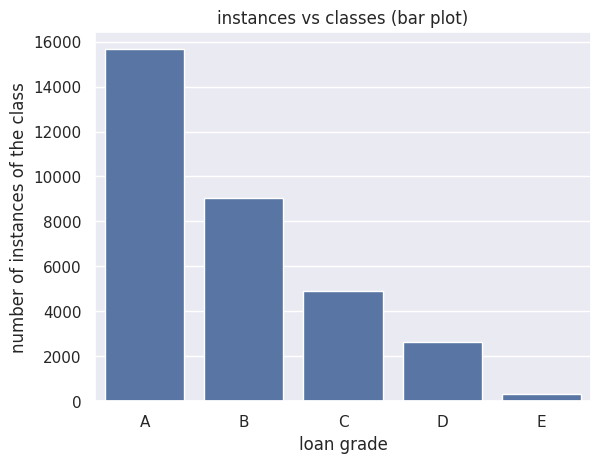

In [150]:
plt.title("instances vs classes (bar plot)")
sbn.barplot(x=["A","B","C","D","E"],y=[15660,9060,4925,2628,308])
plt.xlabel("loan grade")
plt.ylabel("number of instances of the class")


([<matplotlib.patches.Wedge at 0x7fc5dd1e9900>,
 [Text(0.06683376403045209, 1.0979677809414639, 'A'),
  Text(-0.8033480986212534, -0.7514198775928256, 'B'),
  Text(0.5558071475277999, -0.9492515023727961, 'C'),
  Text(1.0466232975932033, -0.3384961933835143, 'D'),
  Text(1.0995149266203361, -0.03266383533936832, 'E')],
 [Text(0.03645478038024659, 0.598891516877162, '48.1%'),
  Text(-0.43818987197522913, -0.4098653877779048, '27.8%'),
  Text(0.3031675350151635, -0.5177735467487978, '15.1%'),
  Text(0.570885435050838, -0.18463428730009868, '8.1%'),
  Text(0.5997354145201832, -0.017816637457837264, '0.9%')])

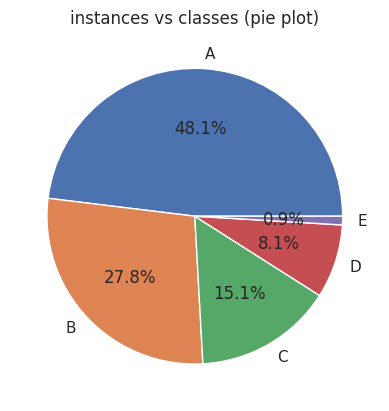

In [151]:
plt.title("instances vs classes (pie plot)")
plt.pie([15660,9060,4925,2628,308],labels=["A","B","C","D","E"],autopct='%1.1f%%')

In [152]:
data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,1,123.0,C,35000.0,16.02,10,3,1,0,0,0,0,1,0
1,21,9600,4,5.0,A,1000.0,11.14,1,2,0,0,1,0,0,0,0
2,25,9600,3,1.0,B,5500.0,12.87,5,3,1,0,0,0,1,0,0
3,23,65500,1,4.0,B,35000.0,15.23,10,2,1,0,0,0,1,0,0
4,24,54400,1,8.0,B,35000.0,14.27,10,4,1,0,0,0,1,0,0


loan_grade vs loan_int_rate (box plot)

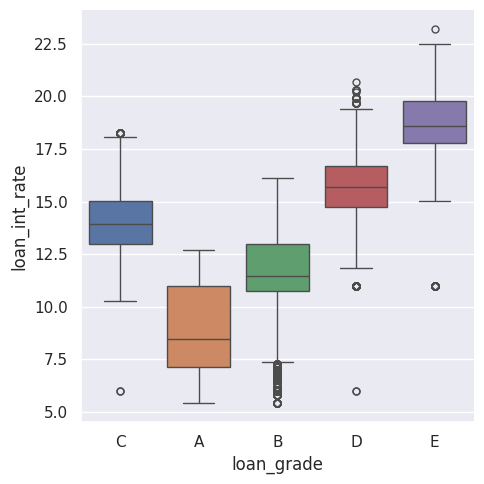

In [153]:
sbn.catplot(x="loan_grade",y="loan_int_rate",data=data,kind="box",hue="loan_grade")

loan_grade vs employement_duration (box plot)

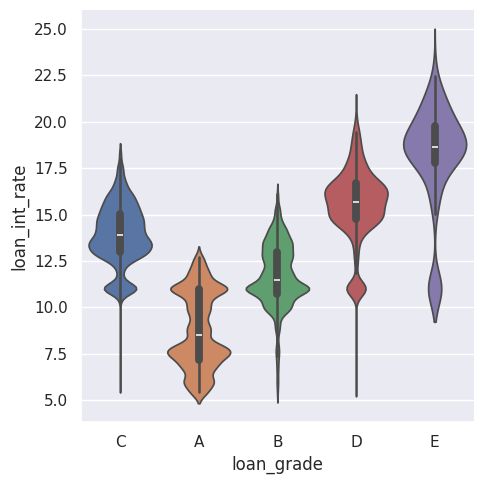

In [154]:
sbn.catplot(x="loan_grade",y="loan_int_rate",data=data,kind="violin",hue="loan_grade")

loan_grade vs employement_duration (violin plot)

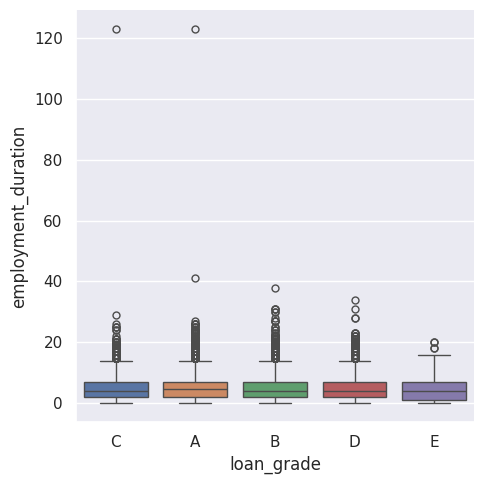

In [155]:
sbn.catplot(x="loan_grade",y="employment_duration",data=data,kind="box",hue="loan_grade")

loan_grade vs loan_amnt (box plot)

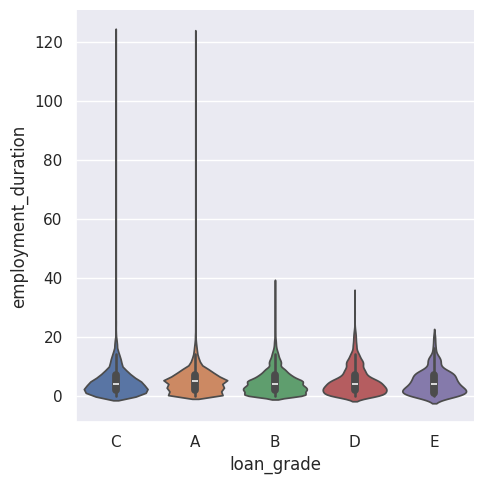

In [156]:
sbn.catplot(x="loan_grade",y="employment_duration",data=data,kind="violin",hue="loan_grade")

loan_grade vs loan_amnt (violin plot)

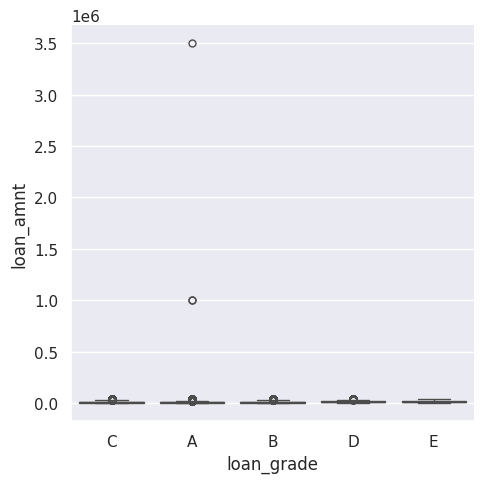

In [157]:
sbn.catplot(x="loan_grade",y="loan_amnt",data=data,kind="box",hue="loan_grade")


loan_grade vs customer_age (box plot)

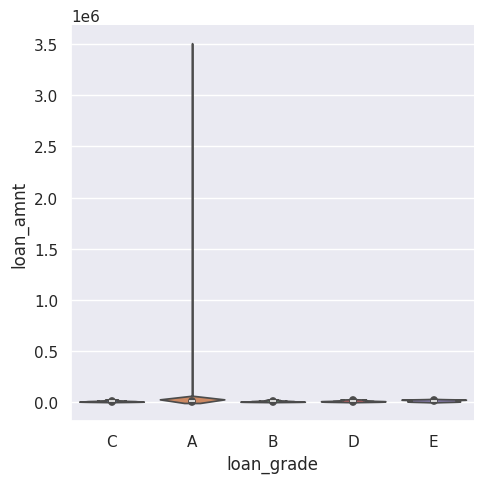

In [158]:
sbn.catplot(x="loan_grade",y="loan_amnt",data=data,kind="violin",hue="loan_grade")

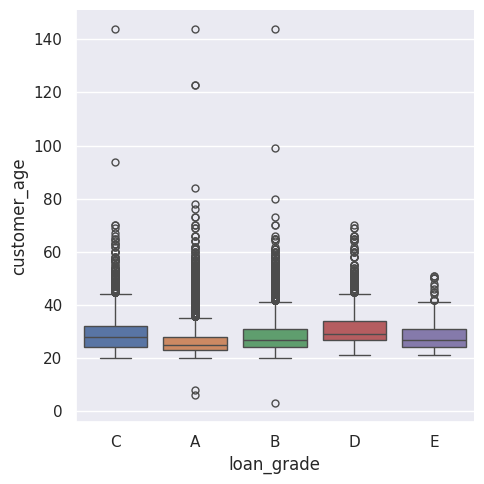

In [159]:
sbn.catplot(x="loan_grade",y="customer_age",data=data,kind="box",hue="loan_grade")

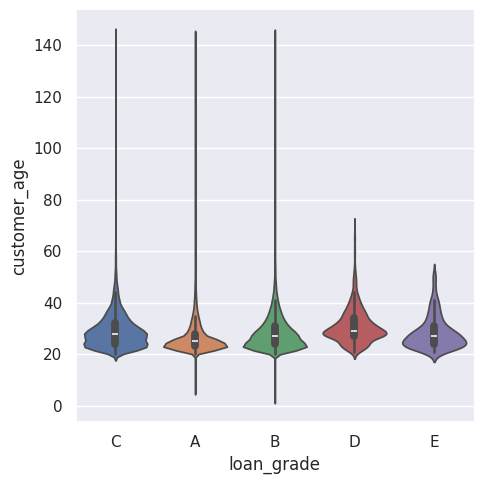

In [160]:
sbn.catplot(x="loan_grade",y="customer_age",data=data,kind="violin",hue="loan_grade")

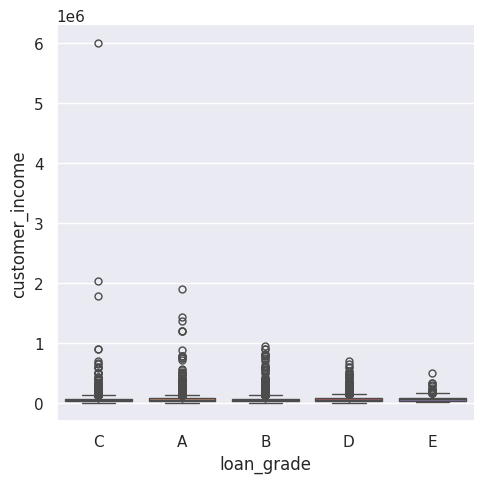

In [161]:
sbn.catplot(x="loan_grade",y="customer_income",data=data,kind="box",hue="loan_grade")


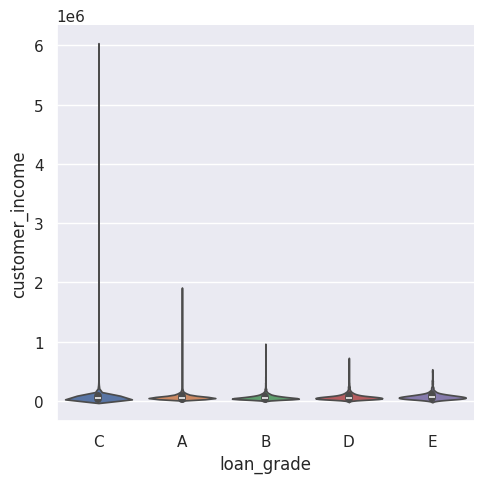

In [162]:
sbn.catplot(x="loan_grade",y="customer_income",data=data,kind="violin",hue="loan_grade")

loan_grade vs loan_int_rate (box plot)

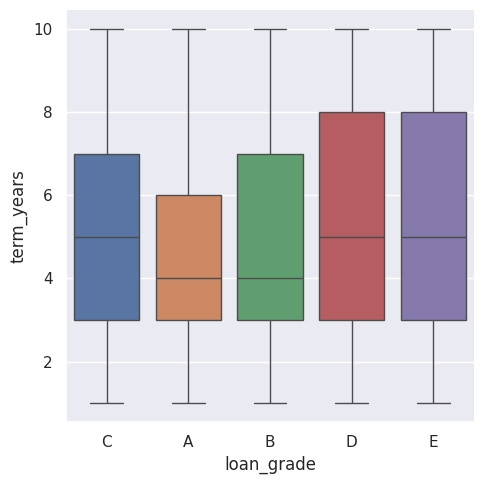

In [163]:
sbn.catplot(x="loan_grade",y="term_years",data=data,kind="box",hue="loan_grade")

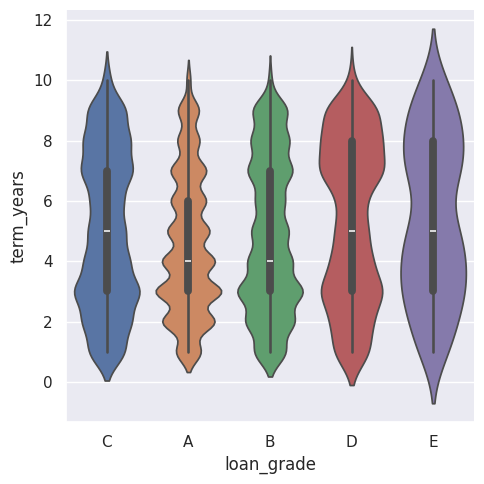

In [164]:
sbn.catplot(x="loan_grade",y="term_years",data=data,kind="violin",hue="loan_grade")

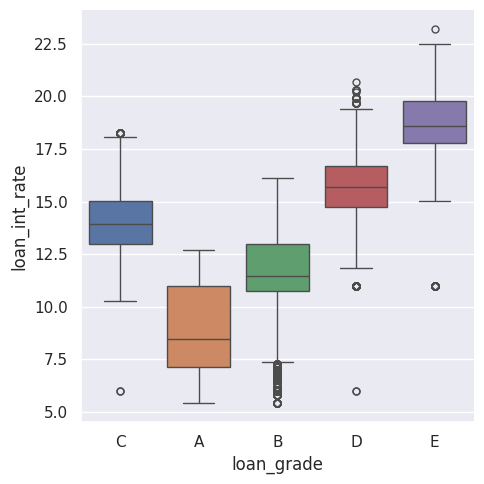

In [165]:

sbn.catplot(x="loan_grade",y="loan_int_rate",data=data,kind="box",hue="loan_grade")

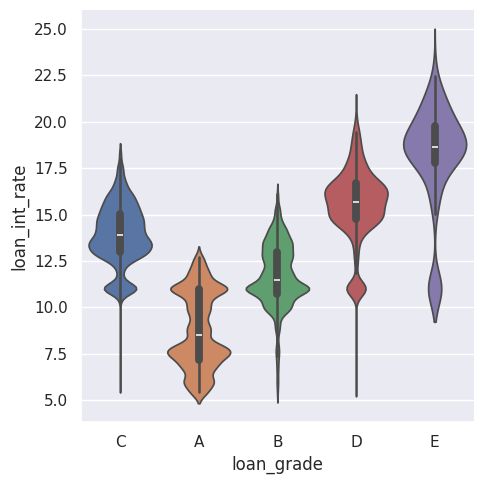

In [166]:
sbn.catplot(x="loan_grade",y="loan_int_rate",data=data,kind="violin",hue="loan_grade")

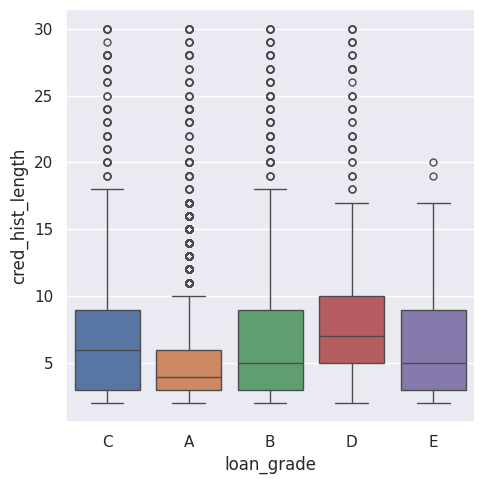

In [167]:
sbn.catplot(x="loan_grade",y="cred_hist_length",data=data,kind="box",hue="loan_grade")

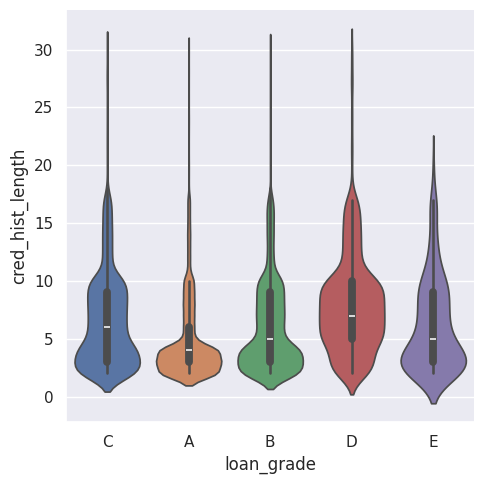

In [168]:
sbn.catplot(x="loan_grade",y="cred_hist_length",data=data,kind="violin",hue="loan_grade")

customer_income vs loan_amnt (pairplot)

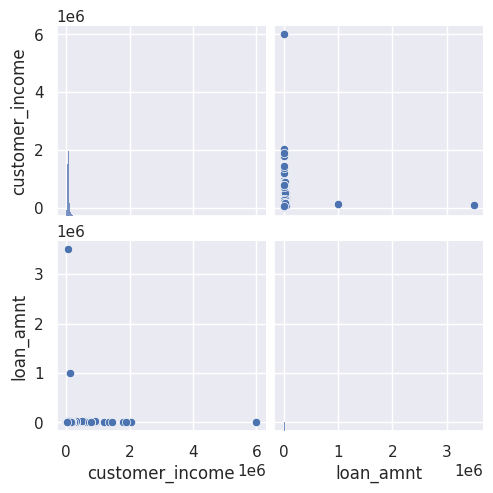

In [169]:
sbn.pairplot(data[["customer_income","loan_amnt"]])

employement_duration vs loan_int_rate (pairplot)

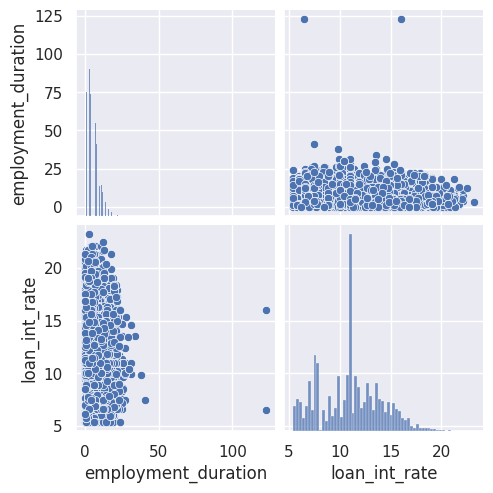

In [170]:
sbn.pairplot(data[["employment_duration","loan_int_rate"]])

transforming data

In [171]:
data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,1,123.0,C,35000.0,16.02,10,3,1,0,0,0,0,1,0
1,21,9600,4,5.0,A,1000.0,11.14,1,2,0,0,1,0,0,0,0
2,25,9600,3,1.0,B,5500.0,12.87,5,3,1,0,0,0,1,0,0
3,23,65500,1,4.0,B,35000.0,15.23,10,2,1,0,0,0,1,0,0
4,24,54400,1,8.0,B,35000.0,14.27,10,4,1,0,0,0,1,0,0


In [172]:
data["loan_grade"].replace(["A","B","C","D","E"],[1,2,3,4,5],inplace=True)

In [173]:
x=data.drop(["loan_grade"],axis=1)
y=data["loan_grade"]

In [174]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
x_new=pd.DataFrame(scaled_x,columns=x.columns)

splitting data into training and testing data

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.25)

In [176]:
x_train.shape

(24433, 15)

In [177]:
x_test.shape

(8145, 15)

MODEL BUILDING

In [178]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('MLP', MLPClassifier()),
    ('Extra Trees',ExtraTreesClassifier())
]

In [179]:
best_model=""
best_accuracy=0

In [180]:
for name,model in models:
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_test_predicted)
    report=classification_report(y_test,y_test_predicted)
    if accuracy > best_accuracy:
        best_model= name
        best_accuracy = accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS

In [181]:
print(best_model)
print(best_accuracy)

Decision Tree
0.8949048496009822


              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3997
           2       0.88      0.87      0.88      2210
           3       0.85      0.84      0.85      1197
           4       0.83      0.84      0.84       670
           5       0.44      0.55      0.49        71

    accuracy                           0.90      8145
   macro avg       0.79      0.81      0.80      8145
weighted avg       0.90      0.90      0.90      8145



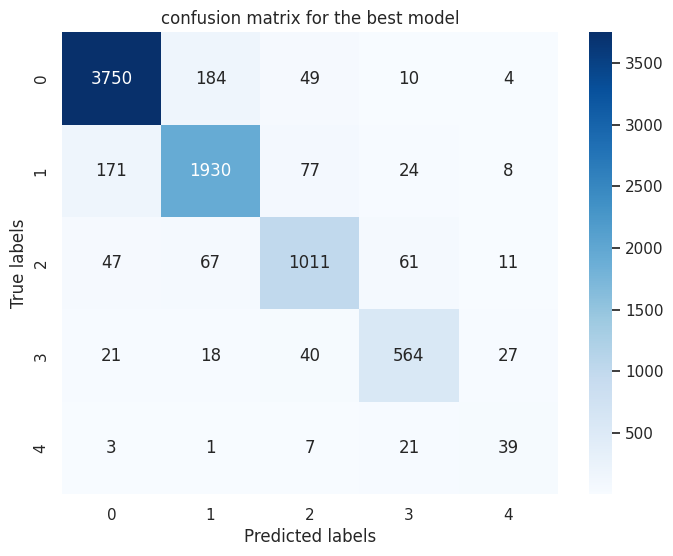

In [182]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_predicted=classifier.predict(x_test)
print(classification_report(y_test,y_predicted))
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(8, 6))
sbn.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("confusion matrix for the best model")
plt.show()